<a href="https://colab.research.google.com/github/shrilz04/Data-Analytics/blob/main/value_inc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# -*- coding: utf-8 -*-
"""
Created on Thu Feb 16 00:30:56 2023

@author: shril
"""
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

data=pd.read_csv('transaction.csv')
data=pd.read_csv('transaction.csv', sep =";")
data.info()

CostPerItem= 11.73
SellingPricePerItem= 21.11
NoOfItemsPurchased= 6

ProfitPerItem= SellingPricePerItem - CostPerItem
ProfitPerTransaction= ProfitPerItem * NoOfItemsPurchased
CostPerTransaction= CostPerItem * NoOfItemsPurchased
SellingPricePerTransaction= NoOfItemsPurchased * SellingPricePerItem

CostPerItem= data['CostPerItem']
NoOfItemsPurchased= data['NumberOfItemsPurchased']
CostPerTransaction= CostPerTransaction= CostPerItem * NoOfItemsPurchased

data['CostPerTransaction'] = CostPerTransaction

SellingPricePerItem= data['SellingPricePerItem']
NoOfItemsPurchased= data['NumberOfItemsPurchased']
SellingPricePerTransaction= NoOfItemsPurchased * SellingPricePerItem

data['SellingPricePerTransaction'] = SellingPricePerTransaction

data['ProfitPerItem']= data['SellingPricePerItem']-data['CostPerItem']
data['ProfitPerTransaction']= data['ProfitPerItem']* data['NumberOfItemsPurchased']

data['Markup']= (data['SellingPricePerTransaction']- data['CostPerTransaction'])/data['CostPerTransaction']

roundmu= round(data['Markup'],2)
data['Markup']= roundmu

date= data['Day'].astype(str)
year= data['Year'].astype(str)
print(date,year.dtype)

my_date= date+'.'+data['Month']+'.'+year #concatination
data['Date']= my_date

data.iloc[0:10]
data.iloc[2]
data.iloc[:,2]

splitcol= data['ClientKeywords'].str.split(',' , expand= True)
data['ClientAge']=splitcol[0]
data['ClientType']=splitcol[1]
data['LengthOfContract']=splitcol[2]

data['ClientAge']= data['ClientAge'].str.replace('[', '')
data['LengthOfContract']=data['LengthOfContract'].str.replace(']', '')

data['ItemDescription']=data['ItemDescription'].str.lower()

seasons=pd.read_csv('value_inc_seasons.csv', sep =";")

data= pd.merge(data, seasons, on= 'Month')
data=data.drop('ClientKeywords', axis=1)
data=data.drop('Day', axis=1)
data=data.drop('Month', axis=1)
data=data.drop('Year', axis=1)

data.to_csv('Value_inc_Cleaned.csv', index= False)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1047588 entries, 0 to 1047587
Data columns (total 13 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   UserId                  1047588 non-null  int64  
 1   TransactionId           1047588 non-null  int64  
 2   Year                    1047588 non-null  int64  
 3   Month                   1047588 non-null  object 
 4   Day                     1047588 non-null  int64  
 5   Time                    1047588 non-null  object 
 6   ItemCode                1047588 non-null  int64  
 7   ItemDescription         1044797 non-null  object 
 8   NumberOfItemsPurchased  1047588 non-null  int64  
 9   CostPerItem             1047588 non-null  float64
 10  SellingPricePerItem     1047588 non-null  float64
 11  Country                 1047588 non-null  object 
 12  ClientKeywords          1047588 non-null  object 
dtypes: float64(2), int64(6), object(5)
memory usage: 103.9+ M

<ipython-input-13-178c082ce38e>:61: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['ClientAge']= data['ClientAge'].str.replace('[', '')
<ipython-input-13-178c082ce38e>:62: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['LengthOfContract']=data['LengthOfContract'].str.replace(']', '')


In [ ]:
data["ItemDescription"].value_counts()

white hanging heart t-light holder    723
regency cakestand 3 tier              696
jumbo bag red retrospot               617
party bunting                         546
lunch bag red retrospot               464
                                     ... 
leaves magnetic  shopping list          1
purple foxglove artiifcial flower       1
vegetable magnetic  shopping list       1
enamel bowl pantry                      1
3 pink hen+chicks in basket             1
Name: ItemDescription, Length: 3809, dtype: int64

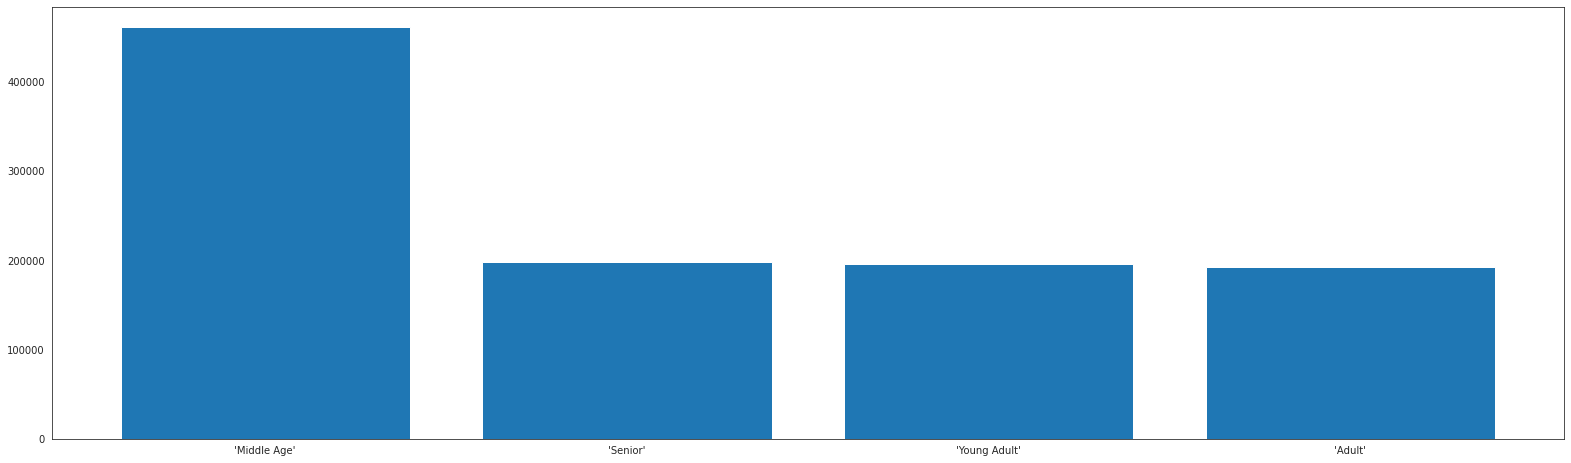

In [ ]:
ClientAge_dict = dict(data.ClientAge.value_counts())

fig = plt.figure(figsize=(21, 6))
ax = fig.add_axes([0,0,1,1])
ax.bar(x=list(ClientAge_dict.keys()), height=list(ClientAge_dict.values()))
plt.show()

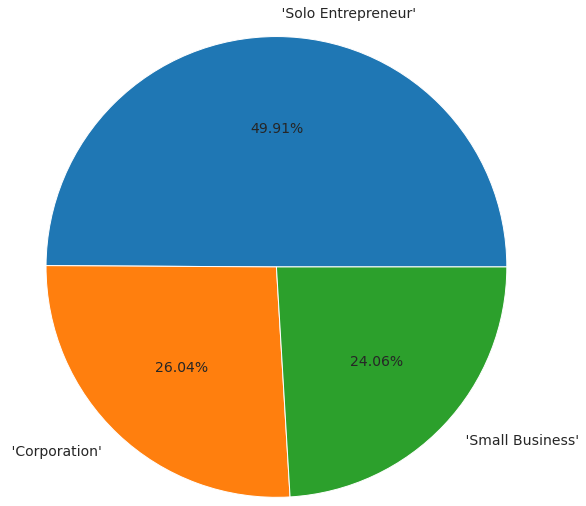

In [ ]:
Item_desc_dict = dict(data.ClientType.value_counts())

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.pie(x=list(Item_desc_dict.values()), 
       labels=list(Item_desc_dict.keys()), 
       autopct="%1.2f%%",
       radius=2,
       textprops={'fontsize': 14})
plt.show()

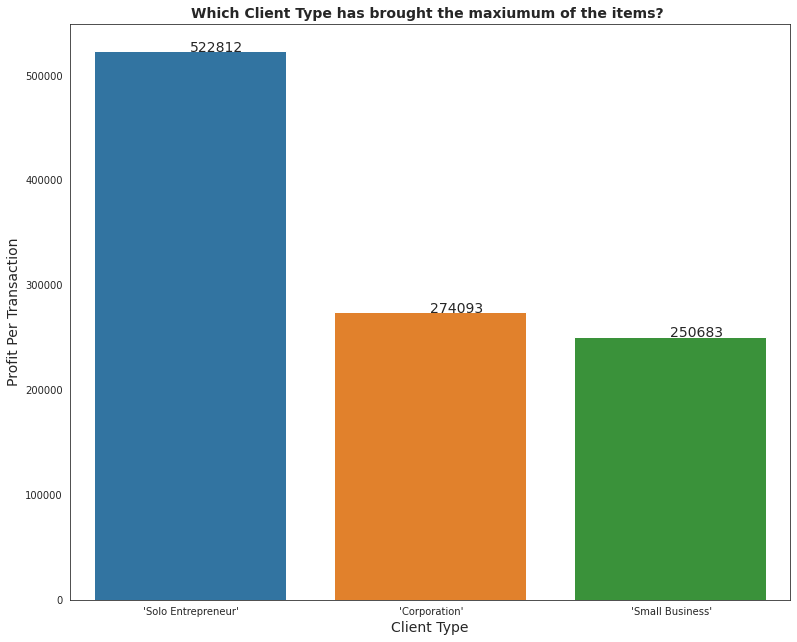

In [ ]:
ax=plt.figure(figsize=(10,8)).add_axes([0,0,1,1])
sns.set_style('white')
sns.countplot(x='ClientType',data= data)
for rect in ax.patches:
    ax.text (rect.get_x() + rect.get_width() / 2,rect.get_height(),"%i"% rect.get_height()
             ,fontsize=14 )

plt.title('Which Client Type has brought the maxiumum of the items? ',fontsize=14, weight='bold')
plt.xlabel('Client Type',fontsize=14)
plt.ylabel('Profit Per Transaction',fontsize=14)
plt.show()


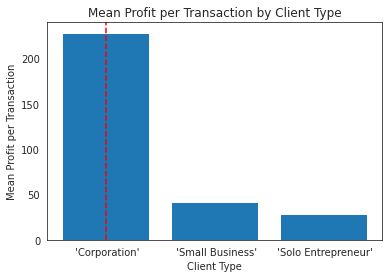

In [ ]:
profits_by_client = data.groupby('ClientType')['ProfitPerTransaction'].mean()
max_profit_client = profits_by_client.idxmax()
plt.bar(profits_by_client.index, profits_by_client.values)
plt.xlabel('Client Type')
plt.ylabel('Mean Profit per Transaction')
plt.title('Mean Profit per Transaction by Client Type')
plt.axvline(x=max_profit_client, color='red', linestyle='--')
plt.show()

Corporation 

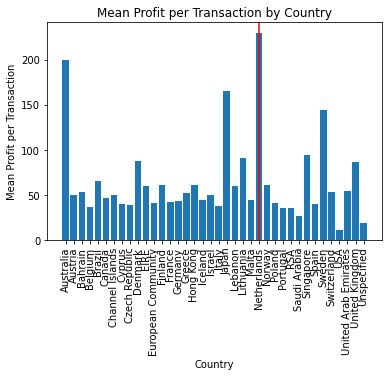

The country with the maximum profit per transaction is: Netherlands


In [ ]:
profits_by_country = data.groupby('Country')['ProfitPerTransaction'].mean()
max_profit_client = profits_by_country.idxmax()
plt.bar(profits_by_country.index, profits_by_country.values)
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.ylabel('Mean Profit per Transaction')
plt.title('Mean Profit per Transaction by Country')
plt.axvline(x=max_profit_client, color='red', linestyle='-')
plt.show()
print("The country with the maximum profit per transaction is:", max_profit_client)





In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1047588 entries, 0 to 1047587
Data columns (total 19 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   UserId                      1047588 non-null  int64  
 1   TransactionId               1047588 non-null  int64  
 2   Time                        1047588 non-null  object 
 3   ItemCode                    1047588 non-null  int64  
 4   ItemDescription             1044797 non-null  object 
 5   NumberOfItemsPurchased      1047588 non-null  int64  
 6   CostPerItem                 1047588 non-null  float64
 7   SellingPricePerItem         1047588 non-null  float64
 8   Country                     1047588 non-null  object 
 9   CostPerTransaction          1047588 non-null  float64
 10  SellingPricePerTransaction  1047588 non-null  float64
 11  ProfitPerItem               1047588 non-null  float64
 12  ProfitPerTransaction        1047588 non-null  float64
 1